In [18]:
#import household pulse data 
#source: https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html#phase3.5

import pandas as pd
import matplotlib.pyplot as plt
file = 'pulse2022_puf_48.csv'
df = pd.read_csv(file)
df.head() #print first five rows of data source

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V480000001,48,41,NaN,4,1411.203878,1261.919425,1946,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,2
1,V480000002,48,31,NaN,3,1021.299839,3735.204079,1958,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
2,V480000003,48,17,16980.0,3,13111.143310,49438.385982,1971,2,2,...,-99,-99,-99,-99,-99,-99,-99,-99,1,1
3,V480000004,48,13,12060.0,2,2123.268644,10637.705782,1967,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,4
4,V480000005,48,33,NaN,1,343.061621,1357.461102,1977,2,1,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,2


In [14]:
#remove observatiosn without gender self-description 
df = df[df['GENID_DESCRIBE'] > 0]

In [15]:
#generates table with total population and trans population by state

#table of trans population (weighted)
trans_gen_table = df[df['GENID_DESCRIBE'] == 3].groupby('EST_ST')['PWEIGHT'].sum().to_frame(
    name = 'trans_sample_wgtd').reset_index().rename(columns = {'EST_ST': 'state'})

#table of total population (weighted)
total_pop_table = df.groupby('EST_ST')['PWEIGHT'].sum().to_frame(
    name = 'total_sample_wgtd').reset_index().rename(columns = {'EST_ST': 'state'})

#merge trans and total population tables by state
table = total_pop_table.merge(trans_gen_table, on = 'state')

#decode from state dictionary and add percent trans column
codebook =[['01','Alabama'],['02','Alaska'],['04','Arizona'],['05','Arkansas'],['06','California'],['08','Colorado'],['09','Connecticut'],['10','Delaware'],['11','District of Columbia'],['12','Florida'],['13','Georgia'],['15','Hawaii'],['16','Idaho'],['17','Illinois'],['18','Indiana'],['19','Iowa'],['20','Kansas'],['21','Kentucky'],['22','Louisiana'],['23','Maine'],['24','Maryland'],['25','Massachusetts'],['26','Michigan'],['27','Minnesota'],['28','Mississippi'],['29','Missouri'],['30','Montana'],['31','Nebraska'],['32','Nevada'],['33','New Hampshire'],['34','New Jersey'],['35','New Mexico'],['36','New York'],['37','North Carolina'],['38','North Dakota'],['39','Ohio'],['40','Oklahoma'],['41','Oregon'],['42','Pennsylvania'],['44','Rhode Island'],['45','South Carolina'],['46','South Dakota'],['47','Tennessee'],['48','Texas'],['49','Utah'],['50','Vermont'],['51','Virginia'],['53','Washington'],['54','West Virginia'],['55','Wisconsin'],['56','Wyoming']]
col = "state"
for lbl in codebook:
    #use line below if codes are stored as integers
    table[col] = table[col].replace(int(lbl[0]), lbl[1])

table['pct_trans'] = table['trans_sample_wgtd']/table['total_sample_wgtd'] #get percent trans
table.to_csv('trans_by_state.csv') #export to CSV
table = table.sort_values('pct_trans') #sort table by percent trans low to high
table.head() #print first five rows of generated table

,state,total_sample_wgtd,trans_sample_wgtd,pct_trans
0,Alaska,5.254565e+05,296.174962,0.000564
30,North Carolina,8.015375e+06,7612.919670,0.000950
31,North Dakota,5.618090e+05,651.045984,0.001159
17,Maryland,4.651372e+06,6496.004483,0.001397
38,South Dakota,6.533328e+05,1004.210086,0.001537


In [20]:
#from above cell, we can see that North Carolina sample has smallest % trans population
#of contiguous United States

#estimate total trans population in North Carolina

#gets North Carolina Data
NC = table[table['state'] == "North Carolina"]

#NC total population
NC_pop = 10390000 #https://www.census.gov/data/developers/data-sets/acs-5year.html

#estimate total NC trans population 
est_trans = float(NC['pct_trans'] * NC_pop)
"NC Estimated Trans Population: "+ str(int(round(est_trans)))

'NC Estimated Trans Population: 9868'

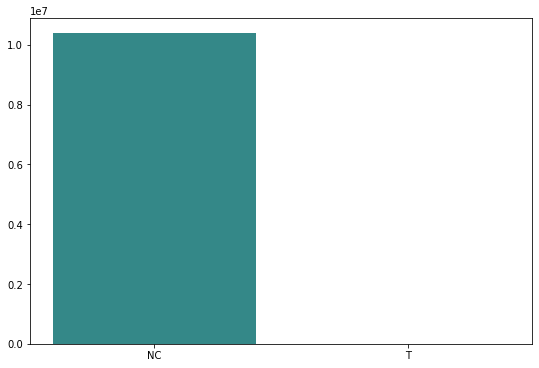

In [45]:
#bar chart
matplotlib.rcParams['figure.figsize'] = (9, 6) #change fig size

plt.bar(["NC", "T"], [NC_pop, est_trans], color = '#348888')
plt.savefig('NC_transpop_bar.png', dpi = 300)

In [5]:
'''
RELEVANT PARTS OF CODEBOOK

GENID_DESCRIBE
"1) Male 
2) Female
3) Transgender
4) None of these
-99) Question seen but category not selected
-88) Missing / Did not report"


EST_ST                    '01'='Alabama'
                    '02'='Alaska'
                    '04'='Arizona'
                    '05'='Arkansas'
                    '06'='California'
                    '08'='Colorado'
                    '09'='Connecticut'
                    '10'='Delaware'
                    '11'='District of Columbia'
                    '12'='Florida'
                    '13'='Georgia'
                    '15'='Hawaii'
                    '16'='Idaho'
                    '17'='Illinois'
                    '18'='Indiana'
                    '19'='Iowa'
                    '20'='Kansas'
                    '21'='Kentucky'
                    '22'='Louisiana'
                    '23'='Maine'
                    '24'='Maryland'
                    '25'='Massachusetts'
                    '26'='Michigan'
                    '27'='Minnesota'
                    '28'='Mississippi'
                    '29'='Missouri'
                    '30'='Montana'
                    '31'='Nebraska'
                    '32'='Nevada'
                    '33'='New Hampshire'
                    '34'='New Jersey'
                    '35'='New Mexico'
                    '36'='New York'
                    '37'='North Carolina'
                    '38'='North Dakota'
                    '39'='Ohio'
                    '40'='Oklahoma'
                    '41'='Oregon'
                    '42'='Pennsylvania'
                    '44'='Rhode Island'
                    '45'='South Carolina'
                    '46'='South Dakota'
                    '47'='Tennessee'
                    '48'='Texas'
                    '49'='Utah'
                    '50'='Vermont'
                    '51'='Virginia'
                    '53'='Washington'
                    '54'='West Virginia'
                    '55'='Wisconsin'
                    '56'='Wyoming'"
                    
                    
'''

'\nRELEVANT PARTS OF CODEBOOK\n\nGENID_DESCRIBE\n"1) Male \n2) Female\n3) Transgender\n4) None of these\n-99) Question seen but category not selected\n-88) Missing / Did not report"\n\n\nEST_ST                    \'01\'=\'Alabama\'\n                    \'02\'=\'Alaska\'\n                    \'04\'=\'Arizona\'\n                    \'05\'=\'Arkansas\'\n                    \'06\'=\'California\'\n                    \'08\'=\'Colorado\'\n                    \'09\'=\'Connecticut\'\n                    \'10\'=\'Delaware\'\n                    \'11\'=\'District of Columbia\'\n                    \'12\'=\'Florida\'\n                    \'13\'=\'Georgia\'\n                    \'15\'=\'Hawaii\'\n                    \'16\'=\'Idaho\'\n                    \'17\'=\'Illinois\'\n                    \'18\'=\'Indiana\'\n                    \'19\'=\'Iowa\'\n                    \'20\'=\'Kansas\'\n                    \'21\'=\'Kentucky\'\n                    \'22\'=\'Louisiana\'\n                    \'23\'=\